<a href="https://colab.research.google.com/github/Fineturkey/AlbertaHealth/blob/main/AlbertaHealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import files
uploaded = files.upload()


Saving mood_tracking_multiple_entries.csv to mood_tracking_multiple_entries.csv


Current Working Directory: /content
Files in Current Directory: ['.config', 'mood_tracking(3).csv', 'mood_tracking(1).csv', 'mood_tracking_multiple_entries.csv', 'mood_tracking(3) (1).csv', 'mood_tracking(2).csv', 'sample_data']
    user_id   mood                 description                 time
0         1  happy          received good news  2024-07-28 02:13:38
1         1    mad  forgot something important  2024-07-28 03:05:38
2         1    mad                 traffic jam  2024-07-29 09:49:38
3         1    sad              feeling lonely  2024-07-29 20:27:38
4         1    mad  forgot something important  2024-07-29 18:29:38
..      ...    ...                         ...                  ...
79        1  happy      spent time with family  2024-08-25 09:07:38
80        1  happy      spent time with family  2024-08-25 19:55:38
81        1  happy      spent time with family  2024-08-26 12:32:38
82        1  happy            had a fun outing  2024-08-26 20:36:38
83        1  happy     

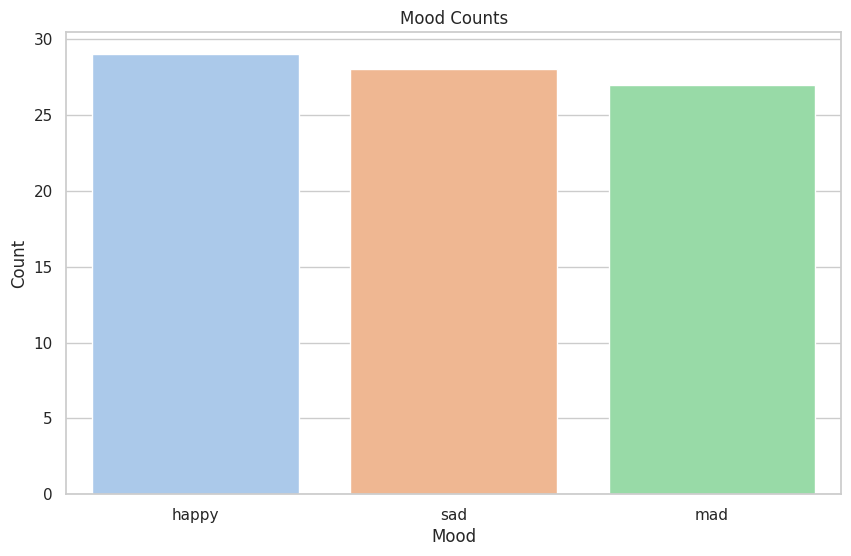

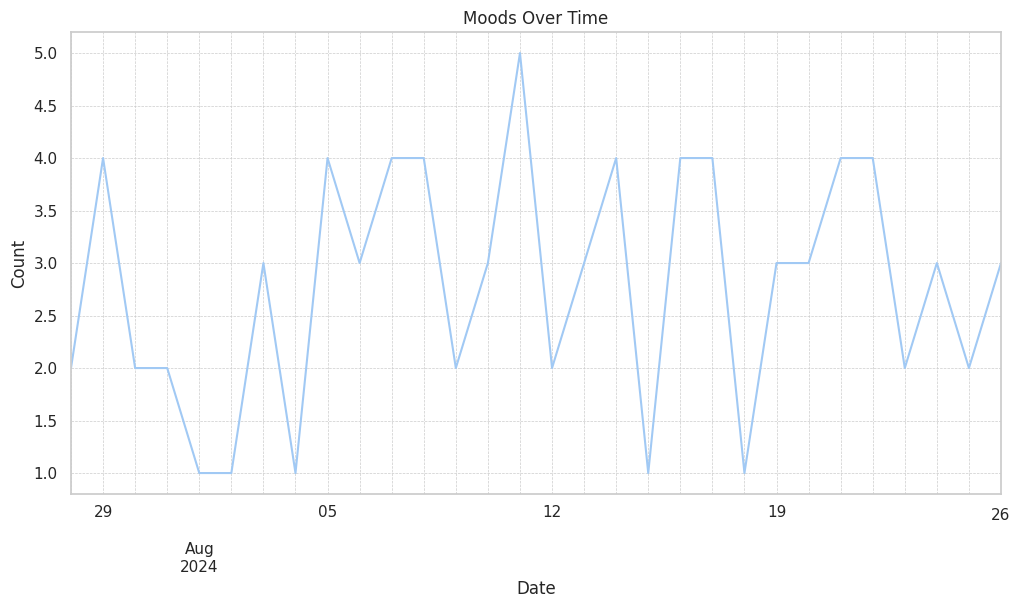

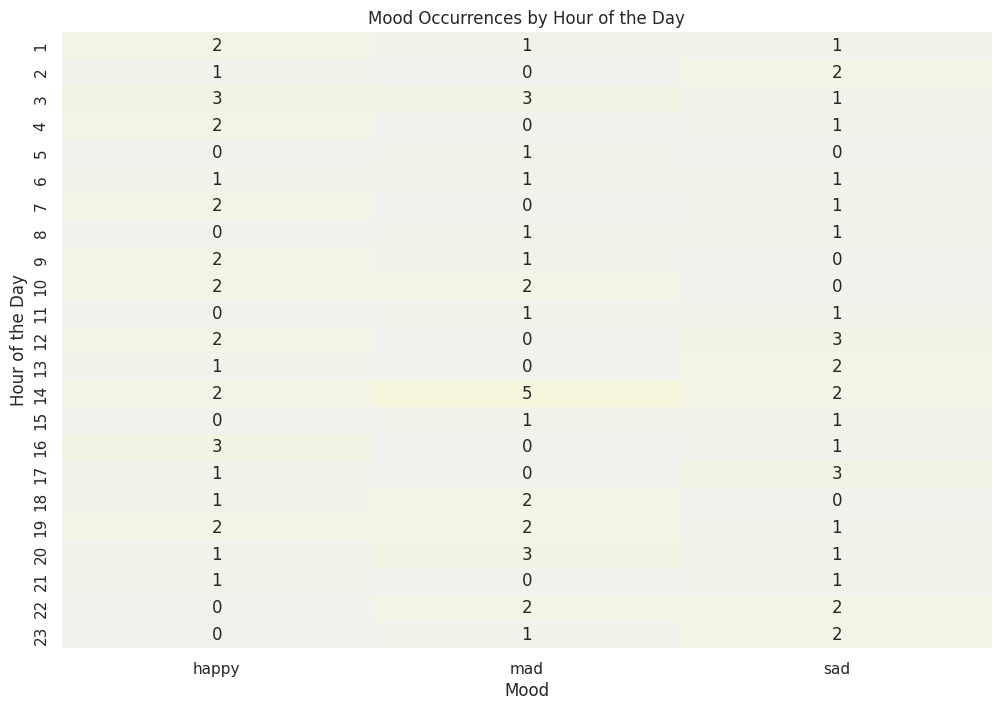

<Figure size 1200x800 with 0 Axes>

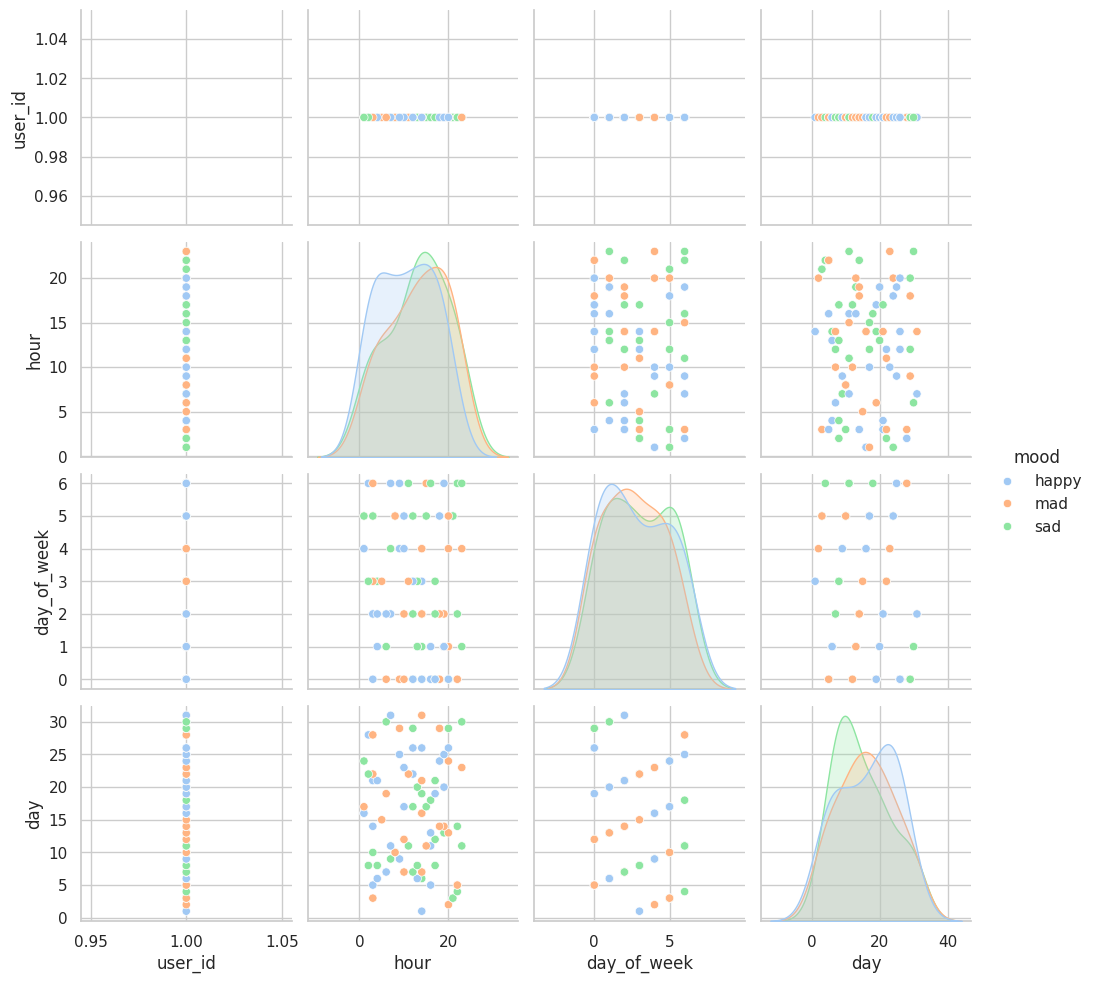

In [35]:
import pandas as pd
import os
import collections
import matplotlib.pyplot as plt
import seaborn as sns

# Set a light beige color theme with soft colors
sns.set_theme(style="whitegrid")
custom_palette = sns.color_palette("pastel", n_colors=3)

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# List files in the current directory to confirm the upload
print("Files in Current Directory:", os.listdir())

# Load the CSV file
csv_file_path = 'mood_tracking_multiple_entries.csv'
df = pd.read_csv(csv_file_path)

# Display the DataFrame
print(df)

# Count the occurrences of each mood
mood_counts = df['mood'].value_counts()
print("\nMood Counts:")
print(mood_counts)

# Filter and display the times when the user is mad
mad_times = df[df['mood'] == 'mad'][['time', 'description']]
print("\nTimes and Descriptions when the user is mad:")
print(mad_times)

# Filter and display the times when the user is happy
happy_times = df[df['mood'] == 'happy'][['time', 'description']]
print("\nTimes and Descriptions when the user is happy:")
print(happy_times)

# Filter and display the times when the user is sad
sad_times = df[df['mood'] == 'sad'][['time', 'description']]
print("\nTimes and Descriptions when the user is sad:")
print(sad_times)

# Analyze the descriptions to find common catalysts for the moods
def find_common_catalysts(descriptions):
    word_counter = collections.Counter()
    for description in descriptions:
        words = description.lower().split()
        word_counter.update(words)
    return word_counter.most_common()

# Find common catalysts for being sad, happy, and mad
sad_descriptions = df[df['mood'] == 'sad']['description']
happy_descriptions = df[df['mood'] == 'happy']['description']
mad_descriptions = df[df['mood'] == 'mad']['description']

common_catalysts_sad = find_common_catalysts(sad_descriptions)
common_catalysts_happy = find_common_catalysts(happy_descriptions)
common_catalysts_mad = find_common_catalysts(mad_descriptions)

print("\nCommon Catalysts for being Sad:")
print(common_catalysts_sad)

print("\nCommon Catalysts for being Happy:")
print(common_catalysts_happy)

print("\nCommon Catalysts for being Mad:")
print(common_catalysts_mad)

# Plot the mood counts
plt.figure(figsize=(10, 6))
sns.barplot(x=mood_counts.index, y=mood_counts.values, palette=custom_palette, hue=mood_counts.index, dodge=False, legend=False)
plt.title('Mood Counts')
plt.xlabel('Mood')
plt.ylabel('Count')
plt.show()

# Plot the mood over time
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
plt.figure(figsize=(12, 6))
df['mood'].resample('D').count().plot(color=custom_palette[0])
plt.title('Moods Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Heatmap of mood occurrences by hour of the day
df['hour'] = df.index.hour
mood_hourly_counts = pd.crosstab(df['hour'], df['mood'])

plt.figure(figsize=(12, 8))
sns.heatmap(mood_hourly_counts, cmap=sns.light_palette("beige", as_cmap=True), annot=True, fmt='d', cbar=False)
plt.title('Mood Occurrences by Hour of the Day')
plt.xlabel('Mood')
plt.ylabel('Hour of the Day')
plt.show()

# Pairplot to visualize relationships between moods and time-related features
df['day_of_week'] = df.index.dayofweek
df['day'] = df.index.day

plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='mood', palette=custom_palette)
plt.show()
